In [1]:
library(MASS)
library(dplyr)
library(ISLR)
select <- dplyr::select

Warning message:
"package 'MASS' was built under R version 4.4.1"

Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ISLR' was built under R version 4.4.1"


In [2]:
train = Smarket %>%
  filter(Year < 2005)

test = Smarket %>%
  filter(Year >= 2005)

model_LDA = lda(Direction~Lag1+Lag2, data = train)
print(model_LDA)

Call:
lda(Direction ~ Lag1 + Lag2, data = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293


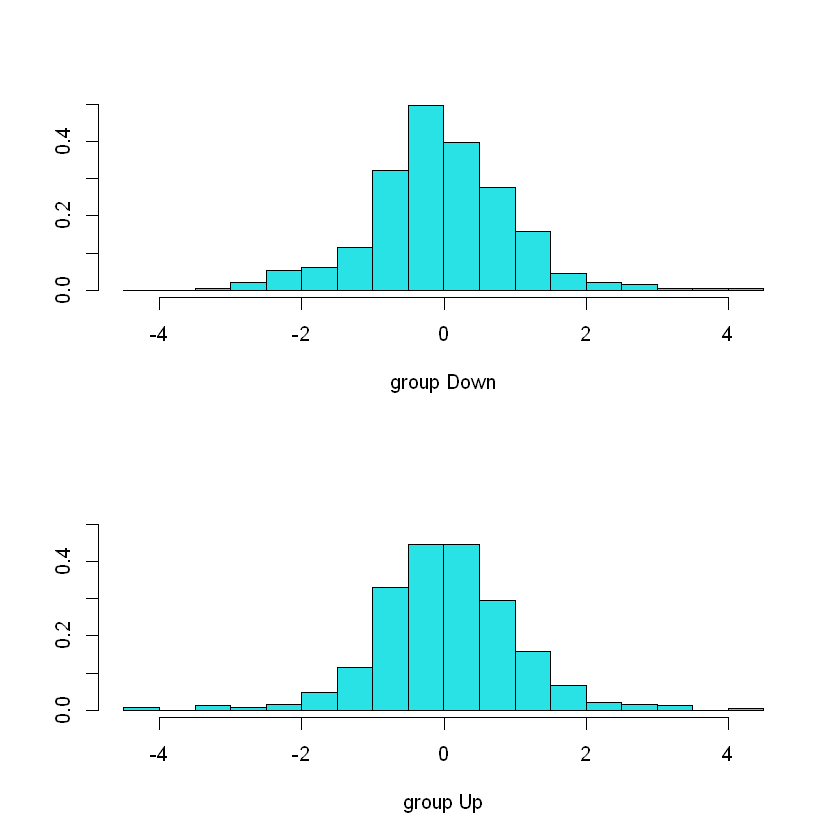

In [3]:
plot(model_LDA)

In [4]:
predictions_LDA = data.frame(predict(model_LDA, test))
names(predictions_LDA)

[1] "class"          "posterior.Down" "posterior.Up"   "LD1"

In [5]:
predictions_LDA_2 = cbind(test, predictions_LDA)

predictions_LDA_2 %>%
  count(class, Direction)

predictions_LDA_2 %>%
  summarize(score = mean(class == Direction))

class,Direction,n
<fct>,<fct>,<int>
Down,Down,35
Down,Up,35
Up,Down,76
Up,Up,106


score
<dbl>
0.5595238


In [6]:
# Logistic model, for comparison
model_logistic = glm(Direction~Lag1+Lag2, data=train ,family=binomial)

logistic_probs = data.frame(probs = predict(model_logistic, test, type="response"))

predictions_logistic = logistic_probs %>%
  mutate(class = ifelse(probs>.5, "Up", "Down"))

predictions_logistic = cbind(test, predictions_logistic)

predictions_logistic %>%
  count(class, Direction)

predictions_logistic %>%
  summarize(score = mean(class == Direction))

class,Direction,n
<chr>,<fct>,<int>
Down,Down,35
Down,Up,35
Up,Down,76
Up,Up,106


score
<dbl>
0.5595238


In [7]:
#Quadratic Discriminant Analysis

model_QDA = qda(Direction~Lag1+Lag2, data = train)
model_QDA

Call:
qda(Direction ~ Lag1 + Lag2, data = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [8]:
predictions_QDA = data.frame(predict(model_QDA, test))

predictions_QDA = cbind(test, predictions_QDA)

predictions_QDA %>%
  count(class, Direction)

predictions_QDA %>%
  summarize(score = mean(class == Direction))

class,Direction,n
<fct>,<fct>,<int>
Down,Down,30
Down,Up,20
Up,Down,81
Up,Up,121


score
<dbl>
0.5992063
